In [34]:
import pandas as pd
import numpy as np
import scipy as ss
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as py
import itertools

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
from google.colab import files
files.upload()

Saving task1.xlsx to task1.xlsx


{'task1.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [4]:
data = pd.read_excel(io = 'task1.xlsx')
data_column = 's_7'

In [ ]:
data.head()

s_7
0    8
1    4
2    8
3    3
4    7

In [ ]:
data.describe() #основные числовые характеристики столбца данных

s_7
count  90.000000
mean    6.277778
std     3.249988
min    -2.000000
25%     4.000000
50%     6.000000
75%     8.000000
max    13.000000

In [ ]:
data.mode() #мода

s_7
0    6

In [ ]:
data.median() #медиана

s_7    6.0
dtype: float64

In [ ]:
data.mean() #среднее значение выборки

s_7    6.277778
dtype: float64

In [ ]:
#размах
print(data.max() - data.min())

s_7    15
dtype: int64


In [ ]:
data.var() # выборочная дисперсия

s_7    10.562422
dtype: float64

In [ ]:
data.std() # среднее отклонение

s_7    3.249988
dtype: float64

In [ ]:
data.sem() # стандартная ошибка среднего

s_7    0.342579
dtype: float64

In [ ]:
data.quantile([0,0.25,0.5,0.75,1]) # квантили

s_7
0.00  -2.0
0.25   4.0
0.50   6.0
0.75   8.0
1.00  13.0

In [ ]:
data.quantile(0.75)-data.quantile(0.25) # интерквартильный размах

s_7    4.0
dtype: float64

<Axes: ylabel='Frequency'>

<Figure size 1600x600 with 0 Axes>

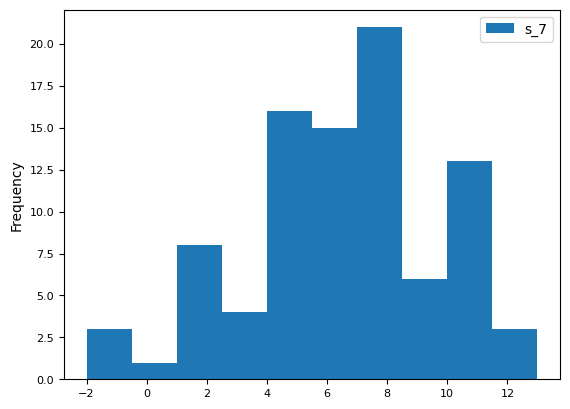

In [ ]:
plt.figure(figsize=(16,6))
data.plot(kind = "hist", fontsize = 8) # гистограмма


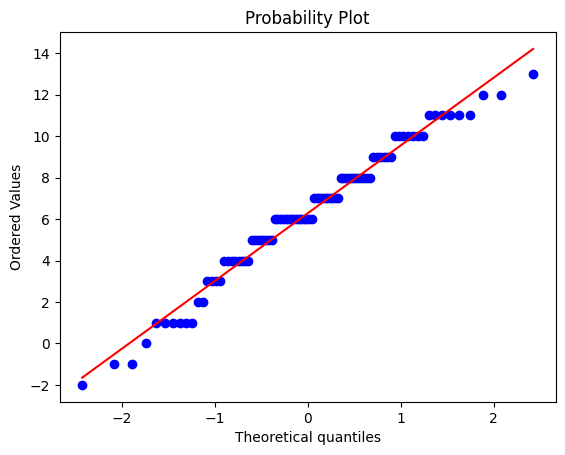

In [ ]:
ss.stats.probplot(data[data_column], dist="norm", plot=plt) #QQ-plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb0f2fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb0f2ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb0f2f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb0f5c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb0f5c7f0>],
 'means': []}

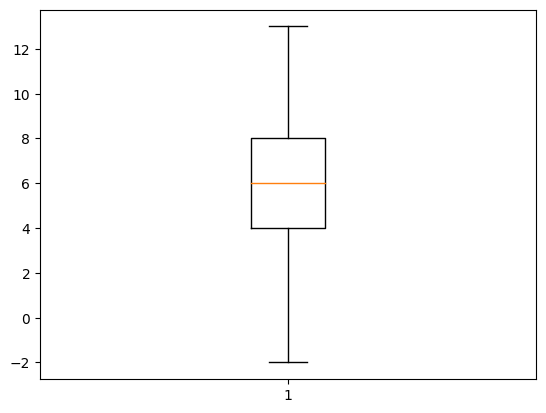

In [ ]:
plt.boxplot(x = data[data_column])

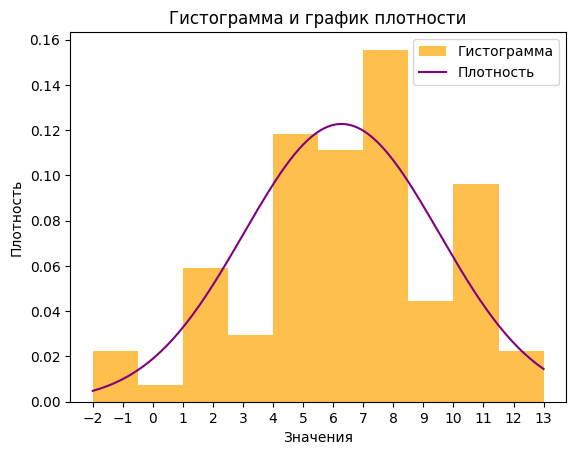

In [12]:
# Параметры для гистограммы и плотности
mean, std = data[data_column].mean(), data[data_column].std()
x_values = np.linspace(data[data_column].min(), data[data_column].max(), 200)
pdf_values = ss.stats.norm.pdf(x_values, mean, std)

# Создание фигуры и осей
fig, ax = plt.subplots()

# Построение гистограммы с нормализацией (density=True для сравнения с PDF)
ax.hist(data[data_column], bins=10, density=True, alpha=0.7, color='orange', label='Гистограмма')

# Построение графика нормальной плотности распределения
ax.plot(x_values, pdf_values, label='Плотность', color='purple')

# Установка пределов оси X с шагом 1
x_min, x_max = int(np.floor(data[data_column].min())), int(np.ceil(data[data_column].max()))
ax.set_xticks(np.arange(x_min, x_max + 1, 1))

# Добавление названий осей и заголовка
ax.set_xlabel('Значения')
ax.set_ylabel('Плотность')
ax.set_title('Гистограмма и график плотности')

# Отображение легенды
ax.legend()

# Показать график
plt.show()

In [ ]:
# Разбиение данных на бины и расчет эмпирических частот
bin_counts_empirical = [1, 11, 20, 15, 21, 6, 13, 3]
total_observations = len(data[data_column])
bin_edges = [-10000, -0.5, 2.5, 5.5, 7, 8.5, 10, 11.5, 10000]

# Расчет параметров нормального распределения (среднее и стандартное отклонение)
mean = np.mean(data[data_column])
std_dev = data.std()[0]

# Расчет ожидаемых частот для нормального распределения

expected_normal = np.zeros(len(bin_counts_empirical))
for i in range(len(bin_counts_empirical)):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    expected = total_observations * (ss.stats.norm.cdf(upper_bound, mean, std_dev) - ss.stats.norm.cdf(lower_bound, mean, std_dev))
    expected_normal[i] = expected

# Расчет статистики Хи-квадрат
chi2_normal = 0
for j in range(len(bin_counts_empirical)):
    observed = bin_counts_empirical[j]
    expected = expected_normal[j]
    if expected != 0:
        result = ((observed - expected) **2) / observed
        chi2_normal += result

# Определение степеней свободы
degrees_of_freedom = len(bin_counts_empirical) - 3  # Учитываем оценку двух параметров (среднее и стандартное отклонение)

# Уровень значимости и критическое значение
alpha = 0.01
chi2_critical = ss.stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"Хи-квадрат для нормального распределения: {chi2_normal:.4f}")
print(f"Степени свободы: {degrees_of_freedom:.4f}")
print(f"Критическое значение Хи-квадрат: {chi2_critical:.4f}")

# Сравнение рассчитанного Хи-квадрат с критическим значением
if chi2_normal > chi2_critical:
    print("Отвергаем нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н1")
else:
    print("Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0")

# Находим p-value
p_value = ss.stats.chi2.sf(chi2_normal, degrees_of_freedom)

print(f"p-value для статистики Хи-квадрат: {p_value:.6f}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н1")
else:
    print("Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0")

Хи-квадрат для нормального распределения: 12.5312
Степени свободы: 5.0000
Критическое значение Хи-квадрат: 15.0863
Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0
p-value для статистики Хи-квадрат: 0.028191
Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0


In [28]:
# Инициализация данных
bin_counts_empirical = [1, 11, 20, 15, 21, 6, 13, 3]
total_observations = sum(bin_counts_empirical)
bin_edges = [-10000, -0.5, 2.5, 5.5, 7, 8.5, 10, 11.5, 10000]

# Расчет ожидаемых частот для нормального распределения
expected_normal = np.diff(ss.stats.norm.cdf(bin_edges, data.mean(), data.std())) * len(data[data_column])

# Расчет статистики Хи-квадрат
chi2_normal = np.sum((bin_counts_empirical - expected_normal) ** 2 / bin_counts_empirical)

# Степени свободы (количество бинов минус количество оцениваемых параметров минус один)
degrees_of_freedom = len(bin_counts_empirical) - 2 - 1

# Уровень значимости и критическое значение Хи-квадрат
alpha = 0.01
chi2_critical = ss.stats.chi2.ppf(1 - alpha, degrees_of_freedom)

# Вывод результатов
print(f"Хи-квадрат для нормального распределения: {chi2_normal:.4f}")
print(f"Степени свободы: {degrees_of_freedom}")
print(f"Критическое значение Хи-квадрат: {chi2_critical:.4f}")

# Сравнение рассчитанного Хи-квадрат с критическим значением
if chi2_normal > chi2_critical:
    print("Отвергаем нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н1")
else:
    print("Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0")

# Находим p-value
p_value = ss.stats.chi2.sf(chi2_normal, degrees_of_freedom)
print(f"p-value для статистики Хи-квадрат: {p_value:.6f}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н1")
else:
    print("Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0")

Хи-квадрат для нормального распределения: 12.5312
Степени свободы: 5
Критическое значение Хи-квадрат: 15.0863
Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0
p-value для статистики Хи-квадрат: 0.028191
Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0


задание 2


In [29]:
from google.colab import files
files.upload()

Saving task2.xlsx to task2.xlsx


{'task2.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [32]:
df = pd.read_excel(io = 'task2.xlsx')
df.head()

y   x1    x2    x3  x4
0  328  5.1  26.1  17.0  67
1  336  4.5  24.3  17.3  71
2  342  4.6  27.2  16.8  73
3  276  7.0  33.0  16.2  65
4  296  4.5  24.7  16.0  79

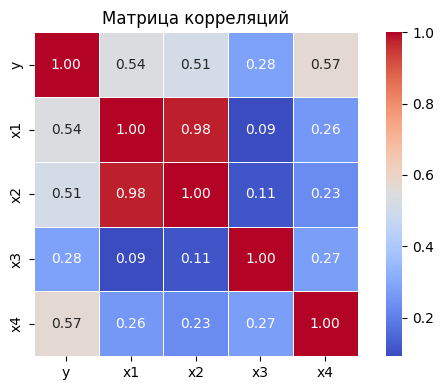

In [33]:
# Вычисление матрицы корреляций
corr_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

In [39]:
# Создаем список всех возможных комбинаций столбцов X, исключая столбец 'y'
predictors = [col for col in df.columns if col != 'y']
combinations = []
for r in range(1, len(predictors) + 1):
    combinations.extend(itertools.combinations(predictors, r))

max_r2_adj = -np.inf
best_combo = None

# Перебираем все комбинации, строим модель и вычисляем Adj. R-squared
for combo in combinations:
    X = sm.add_constant(df[list(combo)])  # Добавляем константу к X
    y = df['y']

    try:
        model = sm.OLS(y, X).fit()
        if model.rsquared_adj > max_r2_adj:
            max_r2_adj = model.rsquared_adj
            best_combo = combo
        print(f"Для комбинации {combo} Adj. R-squared: {model.rsquared_adj:.4f}")
    except np.linalg.LinAlgError:
        print(f"Не удалось подобрать модель для комбинации {combo} из-за проблем с матрицей")

print(f"\nНаилучшая комбинация: {best_combo} с Adj. R-squared: {max_r2_adj:.4f}")

Для комбинации ('x1',) Adj. R-squared: 0.2495
Для комбинации ('x2',) Adj. R-squared: 0.2212
Для комбинации ('x3',) Adj. R-squared: 0.0279
Для комбинации ('x4',) Adj. R-squared: 0.2899
Для комбинации ('x1', 'x2') Adj. R-squared: 0.2096
Для комбинации ('x1', 'x3') Adj. R-squared: 0.2660
Для комбинации ('x1', 'x4') Adj. R-squared: 0.4305
Для комбинации ('x2', 'x3') Adj. R-squared: 0.2325
Для комбинации ('x2', 'x4') Adj. R-squared: 0.4192
Для комбинации ('x3', 'x4') Adj. R-squared: 0.2670
Для комбинации ('x1', 'x2', 'x3') Adj. R-squared: 0.2289
Для комбинации ('x1', 'x2', 'x4') Adj. R-squared: 0.3952
Для комбинации ('x1', 'x3', 'x4') Adj. R-squared: 0.4122
Для комбинации ('x2', 'x3', 'x4') Adj. R-squared: 0.3973
Для комбинации ('x1', 'x2', 'x3', 'x4') Adj. R-squared: 0.3742

Наилучшая комбинация: ('x1', 'x4') с Adj. R-squared: 0.4305


In [40]:
# Подготовка данных с использованием лучшей комбинации переменных
X = df[list(best_combo)]  # Независимые переменные

# Добавление константы (свободного члена) к независимым переменным
X = sm.add_constant(X)

# Построение модели многофакторной регрессии
model = sm.OLS(y, X).fit()

# Получение основных характеристик модели
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     8.182
Date:                Mon, 13 May 2024   Prob (F-statistic):            0.00324
Time:                        14:20:24   Log-Likelihood:                -98.980
No. Observations:                  20   AIC:                             204.0
Df Residuals:                      17   BIC:                             206.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.9656     51.095      3.463      0.0